In [35]:
import pandas as pd 
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,BaseEnsemble
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.impute import SimpleImputer

In [6]:
brupt = pd.read_csv(r"C:\Users\Anonymous\Desktop\Advance Statistics\Bankruptcy\Bankruptcy.csv")
brupt

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14


In [7]:
X = brupt.drop(['NO','YR','D'], axis=1)
y = brupt['D']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=23)


clf = DecisionTreeClassifier(random_state=23)
params = {'max_depth':[None, 3, 4, 5],
          'min_samples_split':[2, 5, 10, 20],
          'min_samples_leaf': [1, 5, 10, 20]}
kfold = StratifiedKFold(n_splits=5, shuffle=True,
                        random_state=23)
gcv_tree = GridSearchCV(clf,param_grid=params,verbose=3,
                   cv=kfold, scoring='neg_log_loss')
gcv_tree.fit(X_train, y_train)
print(gcv_tree.best_params_)
print(gcv_tree.best_score_)






Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-3.794 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-13.279 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-14.017 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-12.015 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-8.010 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=-3.831 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=-9.573 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=-12.076 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=-4.149 total time=   0.0s
[CV 5/5

[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-4.260 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=-2.550 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-2.144 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-9.573 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-12.093 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-4.260 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-0.608 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=-2.144 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=-9.573 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=-12.093 total time=   

[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=-2.051 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=-9.573 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=-12.093 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=-4.112 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=-0.583 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=-2.051 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=-9.573 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=-4.326 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=-4.261 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=-0.583 total ti

[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=-12.104 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=-2.186 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=-4.166 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=5;, score=-2.057 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=5;, score=-7.656 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=5;, score=-12.104 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=5;, score=-2.186 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=5;, score=-4.166 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=-2.057 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=-7.656 total time=   0

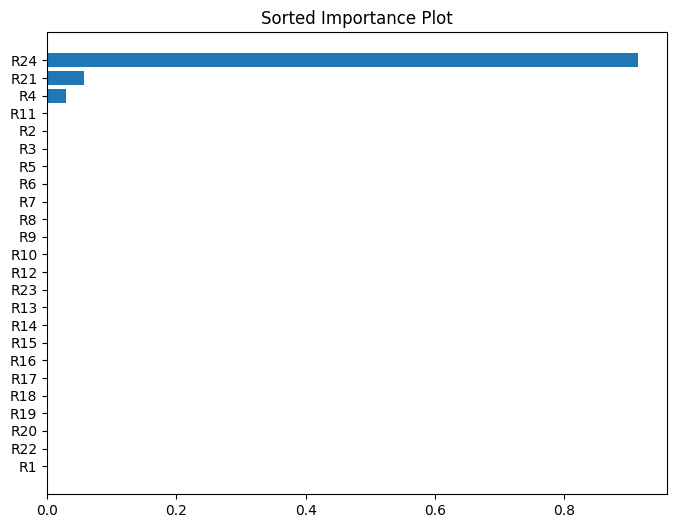

In [8]:
bm_rf = gcv_tree.best_estimator_
imps = bm_rf.feature_importances_
cols = list(X.columns)
imp_df = pd.DataFrame({'feature':cols,
                       'importance':imps})
imp_df.sort_values(by='importance',
                   inplace=True)
plt.figure(figsize=(8,6))
plt.title('Sorted Importance Plot')
plt.barh(imp_df['feature'], imp_df['importance'])
plt.show()

In [9]:
bm_rf

DecisionTreeClassifier(min_samples_leaf=20, random_state=23)

In [10]:
bm_rf.feature_importances_

array([0.        , 0.        , 0.        , 0.02923964, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05702168, 0.        , 0.        , 0.91373868])

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...................max_features=2;, score=-0.184 total time=   0.1s
[CV 2/5] END ...................max_features=2;, score=-0.641 total time=   0.1s
[CV 3/5] END ...................max_features=2;, score=-0.419 total time=   0.1s
[CV 4/5] END ...................max_features=2;, score=-0.417 total time=   0.1s
[CV 5/5] END ...................max_features=2;, score=-0.280 total time=   0.1s
[CV 1/5] END ...................max_features=3;, score=-0.219 total time=   0.1s
[CV 2/5] END ...................max_features=3;, score=-0.679 total time=   0.1s
[CV 3/5] END ...................max_features=3;, score=-0.400 total time=   0.1s
[CV 4/5] END ...................max_features=3;, score=-0.437 total time=   0.1s
[CV 5/5] END ...................max_features=3;, score=-0.265 total time=   0.1s
[CV 1/5] END ...................max_features=4;, score=-0.199 total time=   0.1s
[CV 2/5] END ...................max_features=4;, 

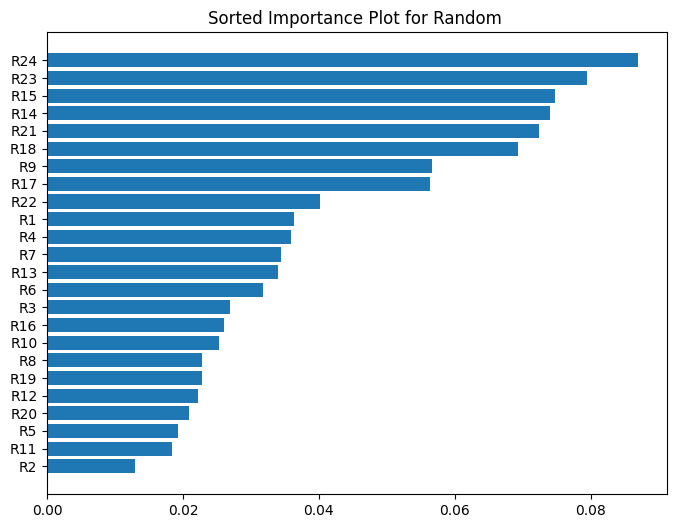

In [12]:
#RF
rf = RandomForestClassifier(random_state=23)
params ={'max_features':[2,3,4,5,6,7]}
gcv_rf = GridSearchCV(rf, param_grid = params,verbose=3,
                      cv= kfold,scoring='neg_log_loss')

gcv_rf.fit(X_train, y_train)
print(gcv_rf.best_params_)
print(gcv_rf.best_score_)

bm_rf = gcv_rf.best_estimator_
imps = bm_rf.feature_importances_
cols = list(X.columns)
imp_df = pd.DataFrame({'feature':cols,
                       'importance':imps})
imp_df.sort_values(by='importance',
                   inplace=True)
plt.figure(figsize=(8,6))
plt.title('Sorted Importance Plot for Random ')
plt.barh(imp_df['feature'], imp_df['importance'])
plt.show()
 


In [14]:
##################### Concrete Dataset 

concrete = pd.read_csv(r"C:\Users\Anonymous\Desktop\Machine Learning\Cases\Concrete Strength\Concrete_Data.csv")
concrete

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [19]:
X = concrete.drop(['Strength'], axis=1)
y = concrete['Strength']


In [23]:

reg = DecisionTreeRegressor(random_state=23)
params = {'max_depth':[None, 3, 4, 5],
          'min_samples_split':[2, 5, 10, 20],
          'min_samples_leaf': [1, 5, 10, 20]}
kfold = KFold(n_splits=5, shuffle=True,
                        random_state=23)
gcv_tree = GridSearchCV(reg,param_grid=params,verbose=3,
                   cv=kfold,scoring= 'neg_mean_squared_error')
gcv_tree.fit(X,y)
print(gcv_tree.best_params_)
print(gcv_tree.best_score_)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-47.016 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-32.768 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-28.209 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-41.914 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-64.821 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=-44.557 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=-34.255 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=-32.864 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=-41.474 total time=   0.0s
[C

[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-109.108 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-109.154 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-120.348 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=-106.828 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=-120.689 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=-109.108 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=-109.154 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=-120.348 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=-106.828 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=20;, score=-1

[CV 4/5] END max_depth=4, min_samples_leaf=5, min_samples_split=10;, score=-102.534 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=5, min_samples_split=10;, score=-84.490 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=5, min_samples_split=20;, score=-95.256 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=5, min_samples_split=20;, score=-87.989 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=5, min_samples_split=20;, score=-89.516 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=5, min_samples_split=20;, score=-102.534 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=5, min_samples_split=20;, score=-84.490 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=10, min_samples_split=2;, score=-95.256 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=10, min_samples_split=2;, score=-87.989 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=10, min_samples_split=2;, score=-89.8

[CV 3/5] END max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=-77.566 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=-87.941 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=-79.196 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=-81.317 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=-65.145 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=-77.566 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=-87.941 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=-79.196 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=-81.317 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=-65.1

In [28]:
#RF
rf = RandomForestRegressor(random_state=23)
params ={'max_features':[2,3,4,5,6,7]}
gcv_rf = GridSearchCV(rf, param_grid = params,verbose=3,cv= kfold,scoring='neg_mean_squared_error')
gcv_rf.fit(X,y)
print(gcv_rf.best_params_)
print(gcv_rf.best_score_)



Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..................max_features=2;, score=-32.653 total time=   0.1s
[CV 2/5] END ..................max_features=2;, score=-27.233 total time=   0.1s
[CV 3/5] END ..................max_features=2;, score=-19.847 total time=   0.1s
[CV 4/5] END ..................max_features=2;, score=-25.703 total time=   0.1s
[CV 5/5] END ..................max_features=2;, score=-30.547 total time=   0.1s
[CV 1/5] END ..................max_features=3;, score=-30.116 total time=   0.2s
[CV 2/5] END ..................max_features=3;, score=-25.267 total time=   0.2s
[CV 3/5] END ..................max_features=3;, score=-17.748 total time=   0.2s
[CV 4/5] END ..................max_features=3;, score=-23.920 total time=   0.2s
[CV 5/5] END ..................max_features=3;, score=-27.085 total time=   0.2s
[CV 1/5] END ..................max_features=4;, score=-30.877 total time=   0.2s
[CV 2/5] END ..................max_features=4;, s

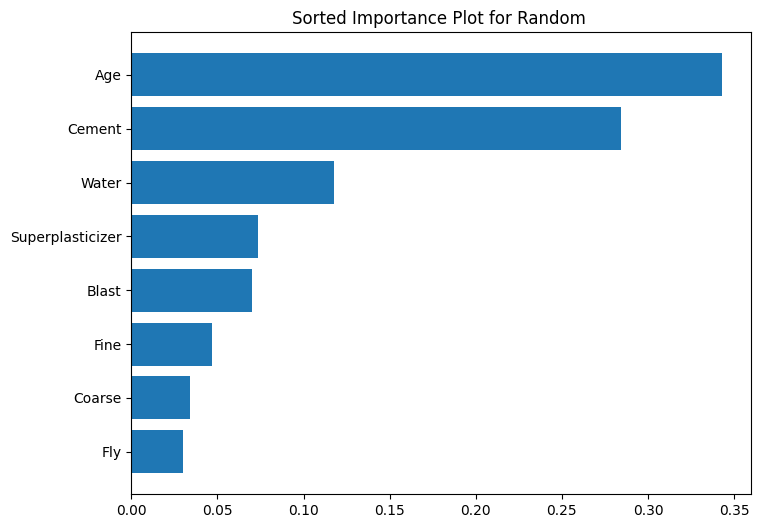

In [29]:
bm_rf = gcv_rf.best_estimator_
imps = bm_rf.feature_importances_
cols = list(X.columns)
imp_df = pd.DataFrame({'feature':cols,
                       'importance':imps})
imp_df.sort_values(by='importance',
                   inplace=True)
plt.figure(figsize=(8,6))
plt.title('Sorted Importance Plot for Random ')
plt.barh(imp_df['feature'], imp_df['importance'])
plt.show()

In [31]:
###### Pipeline 

chemical = pd.read_csv(r"C:\Users\Anonymous\Desktop\Machine Learning\Cases\Chemical Process Data\ChemicalProcess.csv")
chemical

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3,7.2,NaN,NaN,11.6,3.0,1.8,2.4
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2,7.2,0.1,0.15,11.1,0.9,1.9,2.2
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2,7.2,0.0,0.00,12.0,1.0,1.8,2.3
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2,7.2,0.0,0.00,10.6,1.1,1.8,2.1
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2,7.3,0.0,0.00,11.0,1.1,1.7,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,39.66,6.71,56.32,66.19,12.35,20.02,50.26,100.0,17.54,12.50,...,NaN,2.3,0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
172,39.68,6.87,56.74,66.61,12.55,20.18,50.80,100.0,17.48,12.41,...,NaN,1.0,0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
173,42.23,7.50,58.41,68.30,13.33,20.81,52.96,100.0,17.23,12.04,...,NaN,1.3,0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
174,38.48,7.53,58.36,69.25,14.35,20.57,51.31,100.0,17.87,12.77,...,NaN,2.3,0,0.0,0.0,0.00,0.0,0.5,0.0,0.0


In [33]:
X = chemical.drop("Yield",axis = 1)
y = chemical['Yield']

In [34]:
chemical.isnull().sum()

Yield                      0
BiologicalMaterial01       0
BiologicalMaterial02       0
BiologicalMaterial03       0
BiologicalMaterial04       0
BiologicalMaterial05       0
BiologicalMaterial06       0
BiologicalMaterial07       0
BiologicalMaterial08       0
BiologicalMaterial09       0
BiologicalMaterial10       0
BiologicalMaterial11       0
BiologicalMaterial12       0
ManufacturingProcess01     1
ManufacturingProcess02     3
ManufacturingProcess03    15
ManufacturingProcess04     1
ManufacturingProcess05     1
ManufacturingProcess06     2
ManufacturingProcess07     1
ManufacturingProcess08     1
ManufacturingProcess09     0
ManufacturingProcess10     9
ManufacturingProcess11    10
ManufacturingProcess12     1
ManufacturingProcess13     0
ManufacturingProcess14     1
ManufacturingProcess15     0
ManufacturingProcess16     0
ManufacturingProcess17     0
ManufacturingProcess18     0
ManufacturingProcess19     0
ManufacturingProcess20     0
ManufacturingProcess21     0
ManufacturingP